In [1]:
import pandas as pd
import numpy 
from glob import glob
import os
import csv
import matplotlib.pyplot as plt


In [ ]:
#the directories will be split into energy levels and order in pertubation *if* it is LO in the pertubation 
#then there will be another splitting based on as 130 or 118

#for the file structure H_PDFValue_smur_smuf_smallx(0,1)_#particleDecayedInto (0,1,2,3)

In [ ]:
# data = pd.read_csv("/home/ananda/Documents/UCSB/Research_Particle_Phys/afiles/ggHiggs/results_PDF_NNPDF31_lo_as_0118_EFT_NoSmallX.csv")
#files will be stored in .../resultsHiggs/Energy_#LO_asValue/fileName (for 1300)
#fileName will be #PDFValue_smur_smuf_smallx(0,1)_#particleDecayedInto (0,1,2,3)


In [14]:
#all in one loop make everything
basePathInName = '/home/ananda/Documents/UCSB/Research_Particle_Phys/afiles/ggHiggs/'
basePathOutName =  "/home/ananda/Documents/UCSB/Research_Particle_Phys/results/"
for i in range (5): #range goes from 0 to i-1 for range(i)
    if i == 0: #this is the LO_130 at the 1300 nrg
        pathInputName = "SQRT1300/QCDOrder_LO/**/*as_0130*.csv"
        pathResultName = "SQRT1300/LO/as_130"
    if i == 1: #this is the LO_118 at the 1300 nrg
        pathInputName = "SQRT1300/QCDOrder_LO/**/*as_0118*.csv"
        pathResultName = "SQRT1300/LO/as_118"
    if i == 2: #this is the NLO at 1300 nrg
        pathInputName = "SQRT1300/QCDOrder_NLO/**/*.csv"
        pathResultName = "SQRT1300/NLO"
    if i == 3: #this is the NNLO at 1300 nrg
        pathInputName = "SQRT1300/QCDOrder_NNLO/**/*.csv"
        pathResultName = "SQRT1300/NNLO"
    if i == 4: #this is the N3LO at 1300 nrg
        pathInputName = "SQRT1300/QCDOrder_N3LO/**/*.csv"
        pathResultName = "SQRT1300/N3LO"
        
#     checkingStuff(basePathInName+pathInputName)
    createHists(basePathInName+pathInputName,basePathOutName+pathResultName,i)
      

['/home/ananda/Documents/UCSB/Research_Particle_Phys/afiles/ggHiggs/SQRT1300/QCDOrder_LO/MH_880/results_PDF_NNPDF31_lo_as_0130_MT_173.2_MB_4.75_MC_1.275_NoSmallX.csv', '/home/ananda/Documents/UCSB/Research_Particle_Phys/afiles/ggHiggs/SQRT1300/QCDOrder_LO/MH_880/results_PDF_NNPDF31_lo_as_0130_MT_173.2_NoBottom_NoCharm_NoSmallX.csv', '/home/ananda/Documents/UCSB/Research_Particle_Phys/afiles/ggHiggs/SQRT1300/QCDOrder_LO/MH_880/results_PDF_NNPDF31_lo_as_0130_MT_173.2_MB_4.75_MC_1.275_SmallX.csv', '/home/ananda/Documents/UCSB/Research_Particle_Phys/afiles/ggHiggs/SQRT1300/QCDOrder_LO/MH_880/results_PDF_NNPDF31_lo_as_0130_MT_173.2_NoBottom_NoCharm_SmallX.csv', '/home/ananda/Documents/UCSB/Research_Particle_Phys/afiles/ggHiggs/SQRT1300/QCDOrder_LO/MH_880/results_PDF_NNPDF31_lo_as_0130_EFT_SmallX.csv', '/home/ananda/Documents/UCSB/Research_Particle_Phys/afiles/ggHiggs/SQRT1300/QCDOrder_LO/MH_880/results_PDF_NNPDF31_lo_as_0130_EFT_NoSmallX.csv', '/home/ananda/Documents/UCSB/Research_Particle_

['/home/ananda/Documents/UCSB/Research_Particle_Phys/afiles/ggHiggs/SQRT1300/QCDOrder_LO/MH_880/results_PDF_NNPDF31_lo_as_0118_MT_173.2_MB_4.75_NoCharm_SmallX.csv', '/home/ananda/Documents/UCSB/Research_Particle_Phys/afiles/ggHiggs/SQRT1300/QCDOrder_LO/MH_880/results_PDF_NNPDF31_lo_as_0118_MT_173.2_MB_4.75_NoCharm_NoSmallX.csv', '/home/ananda/Documents/UCSB/Research_Particle_Phys/afiles/ggHiggs/SQRT1300/QCDOrder_LO/MH_880/results_PDF_NNPDF31_lo_as_0118_MT_173.2_MB_4.75_MC_1.275_NoSmallX.csv', '/home/ananda/Documents/UCSB/Research_Particle_Phys/afiles/ggHiggs/SQRT1300/QCDOrder_LO/MH_880/results_PDF_NNPDF31_lo_as_0118_EFT_NoSmallX.csv', '/home/ananda/Documents/UCSB/Research_Particle_Phys/afiles/ggHiggs/SQRT1300/QCDOrder_LO/MH_880/results_PDF_NNPDF31_lo_as_0118_EFT_SmallX.csv', '/home/ananda/Documents/UCSB/Research_Particle_Phys/afiles/ggHiggs/SQRT1300/QCDOrder_LO/MH_880/results_PDF_NNPDF31_lo_as_0118_MT_173.2_MB_4.75_MC_1.275_SmallX.csv', '/home/ananda/Documents/UCSB/Research_Particle_Ph

['/home/ananda/Documents/UCSB/Research_Particle_Phys/afiles/ggHiggs/SQRT1300/QCDOrder_NLO/MH_880/results_PDF_NNPDF31_nlo_pdfas_MT_173.2_MB_4.75_MC_1.275_SmallX.csv', '/home/ananda/Documents/UCSB/Research_Particle_Phys/afiles/ggHiggs/SQRT1300/QCDOrder_NLO/MH_880/results_PDF_NNPDF31_nlo_pdfas_EFT_SmallX.csv', '/home/ananda/Documents/UCSB/Research_Particle_Phys/afiles/ggHiggs/SQRT1300/QCDOrder_NLO/MH_880/results_PDF_NNPDF31_nlo_pdfas_MT_173.2_NoBottom_NoCharm_NoSmallX.csv', '/home/ananda/Documents/UCSB/Research_Particle_Phys/afiles/ggHiggs/SQRT1300/QCDOrder_NLO/MH_880/results_PDF_NNPDF31_nlo_pdfas_MT_173.2_MB_4.75_MC_1.275_NoSmallX.csv', '/home/ananda/Documents/UCSB/Research_Particle_Phys/afiles/ggHiggs/SQRT1300/QCDOrder_NLO/MH_880/results_PDF_NNPDF31_nlo_pdfas_MT_173.2_NoBottom_NoCharm_SmallX.csv', '/home/ananda/Documents/UCSB/Research_Particle_Phys/afiles/ggHiggs/SQRT1300/QCDOrder_NLO/MH_880/results_PDF_NNPDF31_nlo_pdfas_EFT_NoSmallX.csv', '/home/ananda/Documents/UCSB/Research_Particle_

['/home/ananda/Documents/UCSB/Research_Particle_Phys/afiles/ggHiggs/SQRT1300/QCDOrder_N3LO/MH_880/results_PDF_NNPDF31_nnlo_pdfas_MT_173.2_MB_4.75_MC_1.275_SmallX.csv', '/home/ananda/Documents/UCSB/Research_Particle_Phys/afiles/ggHiggs/SQRT1300/QCDOrder_N3LO/MH_880/results_PDF_NNPDF31_nnlo_pdfas_MT_173.2_NoBottom_NoCharm_SmallX.csv', '/home/ananda/Documents/UCSB/Research_Particle_Phys/afiles/ggHiggs/SQRT1300/QCDOrder_N3LO/MH_880/results_PDF_NNPDF31_nnlo_pdfas_MT_173.2_NoBottom_NoCharm_NoSmallX.csv', '/home/ananda/Documents/UCSB/Research_Particle_Phys/afiles/ggHiggs/SQRT1300/QCDOrder_N3LO/MH_880/results_PDF_NNPDF31_nnlo_pdfas_EFT_SmallX.csv', '/home/ananda/Documents/UCSB/Research_Particle_Phys/afiles/ggHiggs/SQRT1300/QCDOrder_N3LO/MH_880/results_PDF_NNPDF31_nnlo_pdfas_EFT_NoSmallX.csv', '/home/ananda/Documents/UCSB/Research_Particle_Phys/afiles/ggHiggs/SQRT1300/QCDOrder_N3LO/MH_880/results_PDF_NNPDF31_nnlo_pdfas_MT_173.2_MB_4.75_MC_1.275_NoSmallX.csv', '/home/ananda/Documents/UCSB/Resear

['/home/ananda/Documents/UCSB/Research_Particle_Phys/afiles/ggHiggs/SQRT1300/QCDOrder_N3LO/MH_880/results_PDF_NNPDF31_nnlo_pdfas_MT_173.2_MB_4.75_MC_1.275_SmallX.csv', '/home/ananda/Documents/UCSB/Research_Particle_Phys/afiles/ggHiggs/SQRT1300/QCDOrder_N3LO/MH_880/results_PDF_NNPDF31_nnlo_pdfas_MT_173.2_NoBottom_NoCharm_SmallX.csv', '/home/ananda/Documents/UCSB/Research_Particle_Phys/afiles/ggHiggs/SQRT1300/QCDOrder_N3LO/MH_880/results_PDF_NNPDF31_nnlo_pdfas_MT_173.2_NoBottom_NoCharm_NoSmallX.csv', '/home/ananda/Documents/UCSB/Research_Particle_Phys/afiles/ggHiggs/SQRT1300/QCDOrder_N3LO/MH_880/results_PDF_NNPDF31_nnlo_pdfas_EFT_SmallX.csv', '/home/ananda/Documents/UCSB/Research_Particle_Phys/afiles/ggHiggs/SQRT1300/QCDOrder_N3LO/MH_880/results_PDF_NNPDF31_nnlo_pdfas_EFT_NoSmallX.csv', '/home/ananda/Documents/UCSB/Research_Particle_Phys/afiles/ggHiggs/SQRT1300/QCDOrder_N3LO/MH_880/results_PDF_NNPDF31_nnlo_pdfas_MT_173.2_MB_4.75_MC_1.275_NoSmallX.csv', '/home/ananda/Documents/UCSB/Resear

In [102]:
def checkingStuff(inputPath):
    seperateData = glob(inputPath,recursive=True)
    combinedData = pd.concat([pd.read_csv(f) for f in seperateData], ignore_index=True)

    data = combinedData.to_numpy()
    for f in seperateData:
        file = pd.read_csv(f)
        colNames = list(file.columns)
        for name in colNames:
            if (name == "xsec_LO" or name == "xsec_NLO" or name == "xsec_NNLO" or name == "xsec_N3LO"):
                print ("yes")
#         print(name for name in colNames if name == "xsec_LO" or name == "xsec_NLO" or name == "xsec_NNLO" or name == "xsec_N3LO")

In [13]:
def createHists(inputPath, outputPath, order):
    if order == 3:
        inputPath="/home/ananda/Documents/UCSB/Research_Particle_Phys/afiles/ggHiggs/SQRT1300/QCDOrder_N3LO/**/*.csv"
        
    seperateData = glob(inputPath,recursive=True)
    print(seperateData)
    
    combinedData = pd.concat([pd.read_csv(f) for f in seperateData], ignore_index=True)

    data = combinedData.to_numpy()
    
    xsectionN3LO = data[:,0]
    qcOrder = data[:,1]
    massCharm = data[:,2]
    massBottom = data[:,3]
    smallX = data[:,5]
    xsectionNNLO = data[:,6]
    mH = data[:,7]
    smur = data[:,8]
    massTop = data[:,9]
    pdfmem = data[:,11]
    xsectionLO = data[:,12]
    smuf = data[:,13]
    xsectionNLO = data[:,16]
    
    if order == 3:
        qcOrder = [2 for x in qcOrder]
    

    os.makedirs(outputPath,exist_ok=True) 
    
    files = glob(outputPath+"/*") #this is for removing all the files that were created since I append to files no rewrite
    for f in files:
        os.remove(f)


    for idx,j in enumerate(mH):
        fileName = "/H_"
        fileName = fileName + str(pdfmem[idx])+"_" + str(smur[idx]) +"_"+ str(smuf[idx])+"_"

        if smallX[idx]:
            fileName = fileName + "1_"
        else:
            fileName = fileName + "0_"

        if massTop[idx] == -1:
            fileName = fileName + "0.csv"
        elif massBottom[idx] == -1:
            fileName = fileName + "1.csv"
        elif massCharm[idx] == -1:
            fileName = fileName + "2.csv"
        else:
            fileName = fileName + "3.csv"

        file = open(outputPath+fileName,'a+')
#         if (idx == 30):
#             print(f"This is the file name: {output+fileName}\nThis is the cross section: {xsection[idx]}\nThis is the Higgs Mass {j}")
#             print (dataLO1300_130[idx])
        if qcOrder[idx] == 0:
            point = [j,xsectionLO[idx]]
        elif qcOrder[idx] == 1:
            point = [j,xsectionNLO[idx]]
        elif qcOrder[idx] == 2:
            point = [j,xsectionNNLO[idx]]
        elif qcOrder[idx] == 3:
            point = [j,xsectionN3LO[idx]]
        writer = csv.writer(file)
        writer.writerow(point)

    #     file.write



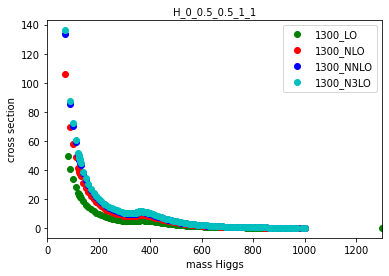

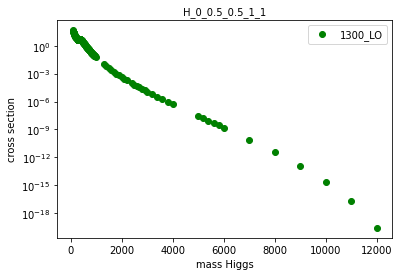

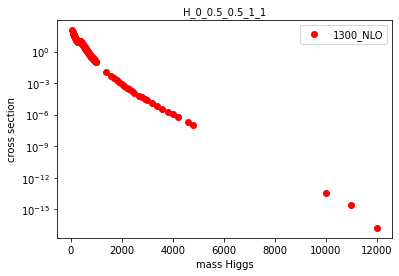

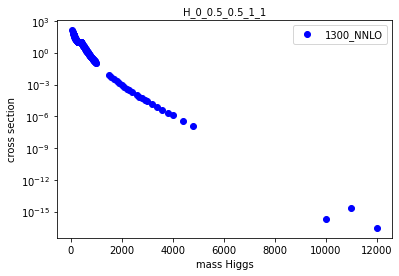

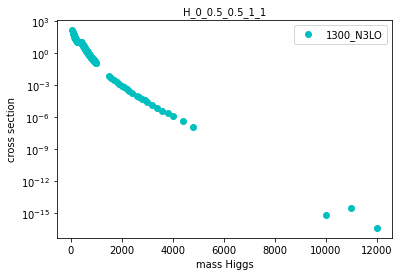

In [11]:
plotALL1300("H_0_0.5_0.5_1_1",True)
plotSep1300("H_0_0.5_0.5_1_1",True)

In [10]:
def plotALL1300(fileName, includeLO):
    basePath = "/home/ananda/Documents/UCSB/Research_Particle_Phys/results/SQRT1300/"
    if includeLO:
        plt.plot(numpy.array(list(giveX(basePath + "LO/as_130/" + fileName)),dtype=numpy.float32),  \
                 numpy.array(list(giveY(basePath + "LO/as_130/" + fileName)),dtype=numpy.float32),   \
                 'o', color = 'g', marker = "o",label = "1300_LO")
    
    plt.plot(numpy.array(list(giveX(basePath + "NLO/" + fileName)),dtype=numpy.float32),  \
             numpy.array(list(giveY(basePath + "NLO/" + fileName)),dtype=numpy.float32),   \
             'o', color = 'r', marker = "o",label = "1300_NLO")
    
    plt.plot(numpy.array(list(giveX(basePath + "NNLO/" + fileName)),dtype=numpy.float32),  \
             numpy.array(list(giveY(basePath + "NNLO/" + fileName)),dtype=numpy.float32),   \
             'o', color = 'b', marker = "o",label = "1300_NNLO")
    
    plt.plot(numpy.array(list(giveX(basePath + "N3LO/" + fileName)),dtype=numpy.float32),  \
             numpy.array(list(giveY(basePath + "N3LO/" + fileName)),dtype=numpy.float32),   \
             'o', color = 'c', marker = "o",label = "1300_N3LO")
    
    # plt.xticks(rotation = 25)
    plt.xlabel('mass Higgs')
    plt.ylabel('cross section')
    plt.title(fileName, fontsize = 10)
    # plt.grid()
    plt.legend()
#     plt.yscale("log")
    plt.xlim(0,1300)
    plt.show()
# for idx,val in enumerate(x):
#     if val == "125":
#         print(y[idx])
#         print(x[idx])
#     if val == "1000":
#         print(y[idx])
#         print(x[idx])

  


In [8]:
def plotSep1300(fileName, includeLO):
    basePath = "/home/ananda/Documents/UCSB/Research_Particle_Phys/results/SQRT1300/"
    for i in range (4):
        if includeLO and i == 0:
            plt.plot(numpy.array(list(giveX(basePath + "LO/as_130/" + fileName)),dtype=numpy.float32),  \
                     numpy.array(list(giveY(basePath + "LO/as_130/" + fileName)),dtype=numpy.float32),   \
                     'o', color = 'g', marker = "o",label = "1300_LO")
    
        if i ==1:
            plt.plot(numpy.array(list(giveX(basePath + "NLO/" + fileName)),dtype=numpy.float32),  \
                     numpy.array(list(giveY(basePath + "NLO/" + fileName)),dtype=numpy.float32),   \
                     'o', color = 'r', marker = "o",label = "1300_NLO")
        if i ==2:
            plt.plot(numpy.array(list(giveX(basePath + "NNLO/" + fileName)),dtype=numpy.float32),  \
                     numpy.array(list(giveY(basePath + "NNLO/" + fileName)),dtype=numpy.float32),   \
                     'o', color = 'b', marker = "o",label = "1300_NNLO")
        if i==3:
            plt.plot(numpy.array(list(giveX(basePath + "N3LO/" + fileName)),dtype=numpy.float32),  \
                     numpy.array(list(giveY(basePath + "N3LO/" + fileName)),dtype=numpy.float32),   \
                     'o', color = 'c', marker = "o",label = "1300_N3LO")
        plt.xlabel('mass Higgs')
        plt.ylabel('cross section')
        plt.title(fileName, fontsize = 10)
        # plt.grid()
        plt.legend()
        plt.yscale("log")
    #     plt.xlim(0,1300)
        plt.show()


In [5]:
def giveX(fName):
    x = []
    with open(fName+'.csv','r') as csvfile:
        lines = csv.reader(csvfile, delimiter=',')
        for row in lines:
            x.append(row[0])
        return x
def giveY(fName):
    y = []
    with open(fName+'.csv','r') as csvfile:
        lines = csv.reader(csvfile, delimiter=',')
        for row in lines:
            y.append(row[1])
        return y

In [ ]:
#LO in 'as' value of 130 with E of 13000 (using this one to test with you can ignore the rest)
seperateLO1300_130 = glob('/home/ananda/Documents/UCSB/Research_Particle_Phys/afiles/ggHiggs/SQRT1300/QCDOrder_LO/**/*as_0130*.csv',recursive=True)

LO1300_130 = pd.concat([pd.read_csv(f) for f in seperateLO1300_130 ], ignore_index=True)

dataLO1300_130 = LO1300_130.to_numpy()


In [ ]:
#LO in 'as' value of 118 with E of 13000
seperateLO1300_118 = glob('/home/ananda/Documents/UCSB/Research_Particle_Phys/afiles/ggHiggs/SQRT1300/QCDOrder_LO/**/*as_0118*.csv',recursive=True)

LO1300_118 = pd.concat([pd.read_csv(f) for f in seperateLO1300_118 ], ignore_index=True)

dataLO1300_118 = LO1300_118.to_numpy()

In [ ]:
#LO w/ 'as' value of 130 w/ E of 13600
seperateLO1360_130 = glob('/home/ananda/Documents/UCSB/Research_Particle_Phys/afiles/ggHiggs/SQRT1360/QCDOrder_LO/**/*as_0130*.csv',recursive=True)

LO1360_130 = pd.concat([pd.read_csv(f) for f in seperateLO1360_130 ], ignore_index=True)

dataLO1360_118 = LO1360_130.to_numpy()


In [ ]:
#LO w/ 'as' value of 118 w/ E of 13600
seperateLO1360_118 = glob('/home/ananda/Documents/UCSB/Research_Particle_Phys/afiles/ggHiggs/SQRT1360/QCDOrder_LO/**/*as_0118*.csv',recursive=True)

LO1360_118 = pd.concat([pd.read_csv(f) for f in seperateLO1360_118 ], ignore_index=True)

dataLO1360_118 = LO1300_130.to_numpy()


In [ ]:
seperateNLO1300 = glob('/home/ananda/Documents/UCSB/Research_Particle_Phys/afiles/ggHiggs/SQRT1300/QCDOrder_NLO/**/*.csv',recursive=True)

NLO1300 = pd.concat([pd.read_csv(f) for f in seperateNLO1300 ], ignore_index=True)

dataNLO1300 = NLO1300.to_numpy()


In [ ]:
seperateNNLO1300 = glob('/home/ananda/Documents/UCSB/Research_Particle_Phys/afiles/ggHiggs/SQRT1300/QCDOrder_NNLO/**/*.csv',recursive=True)

NNLO1300 = pd.concat([pd.read_csv(f) for f in seperateNNLO1300 ], ignore_index=True)

dataNNLO1300 = NNLO1300.to_numpy()


In [ ]:
seperateN3LO1300 = glob('/home/ananda/Documents/UCSB/Research_Particle_Phys/afiles/ggHiggs/SQRT1300/QCDOrder_N3LO/**/*.csv',recursive=True)

N3LO1300 = pd.concat([pd.read_csv(f) for f in seperateN3LO1300 ], ignore_index=True)

datan3LO1300 = N3LO1300.to_numpy()


In [ ]:
seperateNLO1360 = glob('/home/ananda/Documents/UCSB/Research_Particle_Phys/afiles/ggHiggs/SQRT1360/QCDOrder_NLO/**/*.csv',recursive=True)

NLO1360 = pd.concat([pd.read_csv(f) for f in seperateNLO1360 ], ignore_index=True)

dataLO1360 = NLO1360.to_numpy()


In [ ]:
seperateNNLO1360 = glob('/home/ananda/Documents/UCSB/Research_Particle_Phys/afiles/ggHiggs/SQRT1360/QCDOrder_NNLO/**/*.csv',recursive=True)

NNLO1360 = pd.concat([pd.read_csv(f) for f in seperateNNLO1360 ], ignore_index=True)

dataNNLO1360 = NNLO1360.to_numpy()


In [ ]:
seperateN3LO1360 = glob('/home/ananda/Documents/UCSB/Research_Particle_Phys/afiles/ggHiggs/SQRT1360/QCDOrder_N3LO/**/*.csv',recursive=True)

N3LO1360 = pd.concat([pd.read_csv(f) for f in seperateN3LO1360 ], ignore_index=True)

dataN3LO1360 = N3LO1360.to_numpy()


In [ ]:
parentDir = "/home/ananda/Documents/UCSB/Research_Particle_Phys/results/"
LO1300_130 = "SQRT1300/LO/as_130"
LO1300_118 = "SQRT1300/LO/as_118"
NLO1300 = "SQRT1300/NLO"
NNLO1300 = "SQRT1300/NNLO"
N3LO1300 = "SQRT1300/N3LO"

In [ ]:
#this is for the NLO1300 data
NLO1300_path = parentDir+NLO1300
os.makedirs(NLO1300_path,exist_ok=True)   
NmassCharm = dataNLO1300[:,2]
NmassBottom = dataNLO1300[:,3]
NsmallX = dataNLO1300[:,5]
NmH = dataNLO1300[:,7]
Nsmur = dataNLO1300[:,8]
NmassTop = dataNLO1300[:,9]
Nxsection = dataNLO1300[:,12]
Nsmuf = dataNLO1300[:,13]

In [ ]:
#for the file structure H_PDFValue_smur_smuf_smallx(0,1)_#particleDecayedInto (0,1,2,3)
files = glob(LO1300_130_path+"/*") #this is for removing all the files that were created since I append to files no rewrite
for f in files:
    os.remove(f)
    
    
for idx,j in enumerate(mH):
    fileName = "/H_"
    fileName = fileName + "0_" + str(smur[idx]) +"_"+ str(smuf[idx])+"_" #the 0_ is only true for  13000 energy
    if smallX[idx]:
        fileName = fileName + "1_"
    else:
        fileName = fileName + "0_"
        
    if massTop[idx] == -1:
        fileName = fileName + "0.csv"
    elif massBottom[idx] == -1:
        fileName = fileName + "1.csv"
    elif massCharm[idx] == -1:
        fileName = fileName + "2.csv"
    else:
        fileName = fileName + "3.csv"
        
    file = open(LO1300_130_path+fileName,'a+')
    if (idx == 30):
        print(f"This is the file name: {LO1300_130_path+fileName}\nThis is the cross section: {xsection[idx]}\nThis is the Higgs Mass {j}")
        print (dataLO1300_130[idx])
    point = [j,xsection[idx]]
    writer = csv.writer(file)
    writer.writerow(point)
    
#     file.write

In [ ]:
x = []
y = []

with open('/home/ananda/Documents/UCSB/Research_Particle_Phys/results/SQRT1300/LO/as_130/H_0_0.5_0.5_0_1.csv','r') as csvfile:
    lines = csv.reader(csvfile, delimiter=',')
    for row in lines:
        x.append(row[0])
        y.append(row[1])
for idx,val in enumerate(x):
    if val == "125":
        print(y[idx])
        print(x[idx])
    if val == "1000":
        print(y[idx])
        print(x[idx])

  


In [ ]:
# new_x, new_y = zip(*sorted(zip(x, y))) #this is used to sort x values (not needed but nice to know)
plt.plot(numpy.array(list(x),dtype=numpy.float32), numpy.array(list(y),dtype=numpy.float32),'o', color = 'g', marker = "o",label = "Higss mass")
  
# plt.xticks(rotation = 25)
plt.xlabel('mass Higgs')
plt.ylabel('cross section')
plt.title('H_0_0.5_0.5_0_1', fontsize = 10)
# plt.grid()
plt.legend()
plt.show()

In [ ]:
plt.plot(numpy.array(list(x),dtype=numpy.float32), numpy.array(list(y),dtype=numpy.float32),'o', color = 'g', marker = "o",label = "Higss mass")
  
# plt.xticks(rotation = 25)
plt.xlabel('mass Higgs')
plt.ylabel('cross section')
plt.title('H_0_0.5_0.5_0_1', fontsize = 10)
# plt.grid()
plt.legend()
plt.yscale("log")
plt.show()

In [ ]:
plt.plot(numpy.array(list(x),dtype=numpy.float32), numpy.array(list(y),dtype=numpy.float32),'o', color = 'g', marker = "o",label = "Higss mass")
  
# plt.xticks(rotation = 25)
plt.xlabel('mass Higgs')
plt.ylabel('cross section')
plt.title('H_0_0.5_0.5_0_1', fontsize = 10)
# plt.grid()
plt.legend()
plt.yscale("log")
plt.xlim(0,1300)
plt.show()